# 世界の災害の歴史

世界中でいろいろな災害のニュースを聞く機会が増えてきているが、実際昔と比べてどれほどの災害が発生しているのだろうか。
主に日本に焦点を当てて分析していこうと思います。

# No.1 世界の種類別災害発生件数

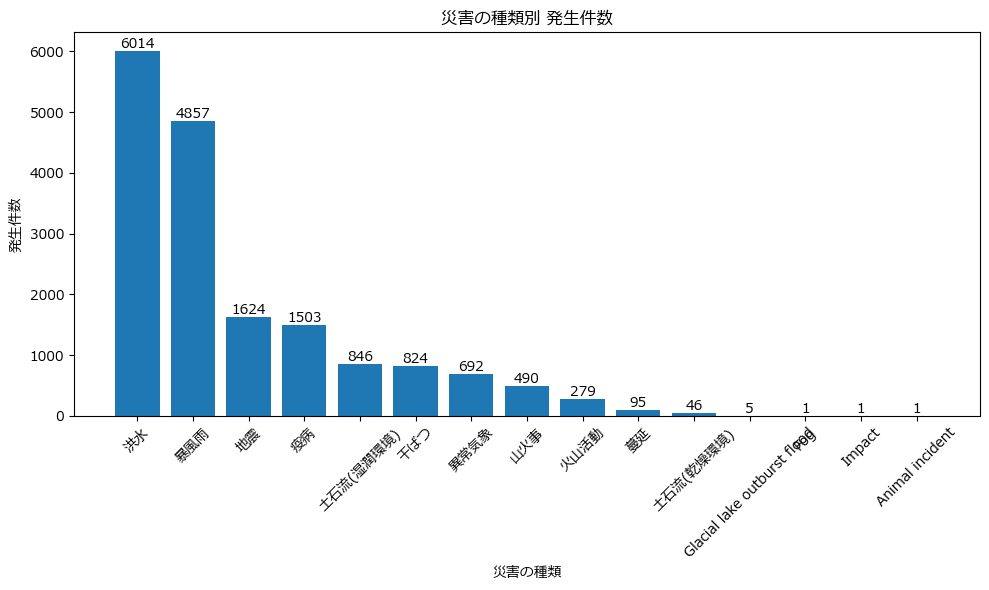

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ 日本語フォント（WindowsはMeiryoが確実）
plt.rcParams["font.family"] = "Meiryo"


csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"

# ===== 1. CSV読み込み =====
df = pd.read_csv(csv_path)

# ===== 災害タイプ列の自動検出 =====
possible_cols = [c for c in df.columns if "type" in c.lower()]
col = possible_cols[0]

# ===== 集計 =====
counts = df[col].value_counts()

# ===== 英語→日本語マッピング =====
mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
    "Mass movement (wet)":"土石流(湿潤環境)",
    "Infestation":"蔓延",
    "Mass movement (dry)":"土石流(乾燥環境)",
}

counts_jp = counts.rename(index=lambda x: mapping.get(x, x))

# ===== グラフ描画 =====
plt.figure(figsize=(10, 6))
bars = plt.bar(counts_jp.index, counts_jp.values)

# ラベル（数字）を棒の上に表示
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(int(height)),
        ha="center", va="bottom"
    )

plt.xticks(rotation=45)
plt.xlabel("災害の種類")
plt.ylabel("発生件数")
plt.title("災害の種類別 発生件数")
plt.tight_layout()
plt.show()


上に数字を載せて少し見やすくしてみました。また、ほとんど日本語対応させましたが一部日本語訳が分からないものなどはそのままにしてあります。

**洪水や暴風雨がずば抜けて多い**ことが分かります。17278件中上位二つだけで10871件も占めていることから、**地球での災害の半分以上は雨関連によるもの**であるといえます。

# No.2 日本だけに絞り込んだバージョン

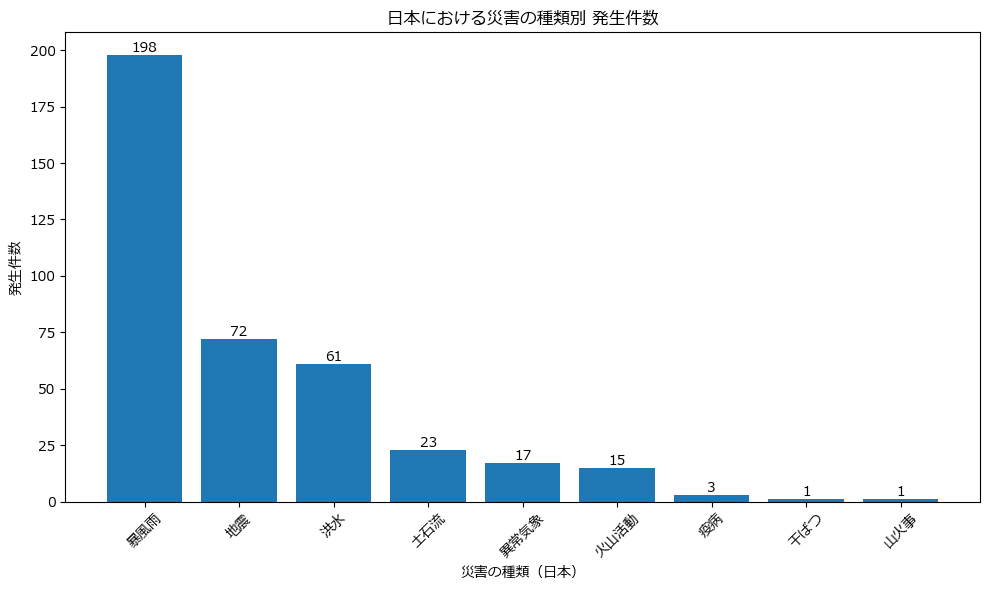

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ 日本語フォント（Windows用：Meiryo）
plt.rcParams["font.family"] = "Meiryo"

csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"

# ===== CSV読み込み =====
df = pd.read_csv(csv_path)

# ===== 国名列を推測（Country を含む列を使う）=====
country_cols = [c for c in df.columns if "country" in c.lower()]
country_col = country_cols[0]   # 例: "Country"

# ===== 災害タイプ列を推測 =====
type_cols = [c for c in df.columns if "type" in c.lower()]
type_col = type_cols[0]         # 例: "Disaster Type"

# ===== 日本のデータだけ抽出 =====
df_japan = df[df[country_col] == "Japan"]

# ===== 種類ごとの件数カウント =====
counts = df_japan[type_col].value_counts()

# ===== 英語→日本語マッピング =====
mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
    "Mass movement (wet)":"土石流",
}

# 日本語に変換
counts_jp = counts.rename(index=lambda x: mapping.get(x, x))

# ===== グラフ描画 =====
plt.figure(figsize=(10, 6))
bars = plt.bar(counts_jp.index, counts_jp.values)

# 棒の上に数字を表示
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.xticks(rotation=45)
plt.xlabel("災害の種類（日本）")
plt.ylabel("発生件数")
plt.title("日本における災害の種類別 発生件数")
plt.tight_layout()
plt.show()


自分は勝手に地震が一番多いだろうなと思っていましたが、どうやら**暴風雨がダントツで多い**ようです。ただ、世界データと異なり洪水は1位ではなく3位になっています。
世界のデータだと地震は3位でしたが、やはり日本は地震大国なだけあって**2位**となっています。

# No.3 日本における災害発生状況マップ

In [ ]:
import pandas as pd
import folium

csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"
# ===== CSV読み込み =====
df = pd.read_csv(csv_path)

# ===== 列名推測 =====
country_cols = [c for c in df.columns if "country" in c.lower()]
disaster_cols = [c for c in df.columns if "type" in c.lower()]
lat_cols = [c for c in df.columns if "lat" in c.lower()]
lon_cols = [c for c in df.columns if "lon" in c.lower()]
year_cols = [c for c in df.columns if "year" in c.lower()]

country_col = country_cols[0]
type_col = disaster_cols[0]
lat_col = lat_cols[0]
lon_col = lon_cols[0]
year_col = year_cols[0]

# ===== 日本だけ抽出 =====
df_japan = df[df[country_col] == "Japan"].copy()

# ===== 英語 → 日本語変換 =====
mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
}

df_japan["Disaster_JP"] = df_japan[type_col].map(lambda x: mapping.get(x, x))

# ===== 色設定 =====
color_map = {
    "地震": "red",
    "洪水": "blue",
    "暴風雨": "green",
    "火山活動": "orange",
    "異常気象": "purple",
    "干ばつ": "brown",
    "地滑り": "cadetblue",
    "山火事": "darkred",
    "疫病": "pink",
    "昆虫害": "gray",
}

# ===== folium map 作成 =====
m = folium.Map(location=[36.2048, 138.2529], zoom_start=5)

# ===== マーカー追加 =====
for _, row in df_japan.iterrows():
    lat = row[lat_col]
    lon = row[lon_col]
    if pd.isna(lat) or pd.isna(lon):
        continue

    disaster_jp = row["Disaster_JP"]
    year = row[year_col]

    popup_html = f"""
    <b>災害の種類:</b> {disaster_jp}<br>
    <b>発生年:</b> {year}
    """

    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color_map.get(disaster_jp, "black"),
        fill=True,
        fill_color=color_map.get(disaster_jp, "black"),
        tooltip=f"{disaster_jp}（{year}）",
        popup=popup_html
    ).add_to(m)

m


日本に絞り込んでマップを作ってみました。ポイントにカーソルを合わせると災害の種類と発生年が表示されるようにしました。なお、緯度経度の情報が載っていない記録はマップに乗せようがないので入れていないです。また、災害の種類ごとに色を分けることによって一目で異なる災害であることを認識できるようにしました。なぜか一部日本以外の場所も表示されてしまっていますが原因を解明できなかったのでそのままにしています。おそらく、該当する災害が発生した時点では日本領だったが今はそうではない場所が含まれているのではないかと思っています。

# No.3.1 絞り込み機能を追加したマップ

In [ ]:
folium.LayerControl()


In [ ]:
import pandas as pd
import folium

csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"
df = pd.read_csv(csv_path)

# 列名推測
country_cols = [c for c in df.columns if "country" in c.lower()]
disaster_cols = [c for c in df.columns if "type" in c.lower()]
lat_cols = [c for c in df.columns if "lat" in c.lower()]
lon_cols = [c for c in df.columns if "lon" in c.lower()]
year_cols = [c for c in df.columns if "year" in c.lower()]

country_col = country_cols[0]
type_col = disaster_cols[0]
lat_col = lat_cols[0]
lon_col = lon_cols[0]
year_col = year_cols[0]

# 日本だけ
df_japan = df[df[country_col] == "Japan"].copy()

# 英語→日本語
mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
}
df_japan["Disaster_JP"] = df_japan[type_col].map(lambda x: mapping.get(x, x))

# 色分け
color_map = {
    "地震": "red",
    "洪水": "blue",
    "暴風雨": "green",
    "火山活動": "orange",
    "異常気象": "purple",
    "干ばつ": "brown",
    "地滑り": "cadetblue",
    "山火事": "darkred",
    "疫病": "pink",
    "昆虫害": "gray",
}

# ベースマップ
m = folium.Map(location=[36.2048, 138.2529], zoom_start=5)

groups = {}

for disaster_type in df_japan["Disaster_JP"].unique():
    groups[disaster_type] = folium.FeatureGroup(name=disaster_type)
    groups[disaster_type].add_to(m)

# ---- マーカー追加 ----
for _, row in df_japan.iterrows():
    lat = row[lat_col]
    lon = row[lon_col]
    if pd.isna(lat) or pd.isna(lon):
        continue

    disaster_jp = row["Disaster_JP"]
    year = row[year_col]

    popup_html = f"""
    <b>災害の種類:</b> {disaster_jp}<br>
    <b>発生年:</b> {year}
    """

    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color_map.get(disaster_jp, "black"),
        fill=True,
        fill_color=color_map.get(disaster_jp, "black"),
        popup=popup_html,
        tooltip=f"{disaster_jp}（{year}）"
    ).add_to(groups[disaster_jp])

# ---- 絞り込み UI（LayerControl）追加 ----
folium.LayerControl().add_to(m)

m


右上の四角から絞り込みできます。
絞り込み機能を追加したことによって目的の項目をより発見しやすくなったと思います。

# No.4 災害の発生数と死者数の関係

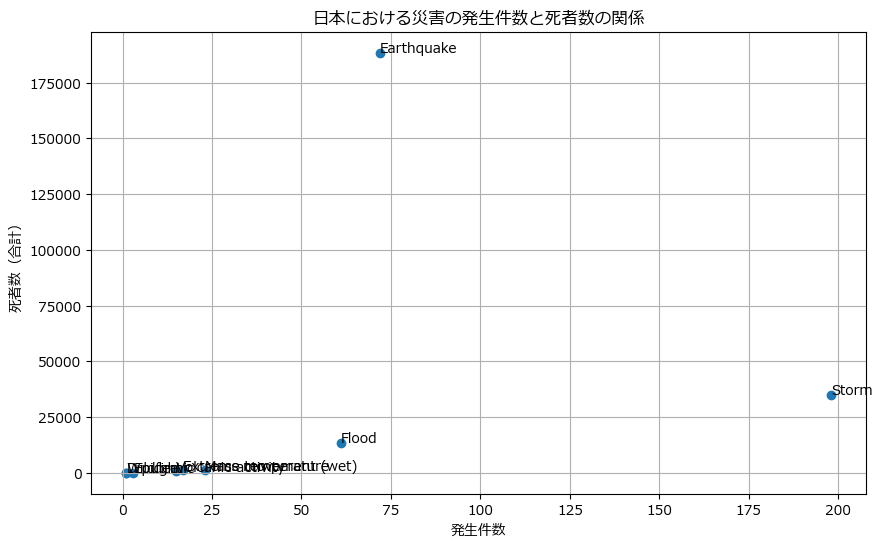

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ CSV のパスを調整
csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"
# ===== CSV 読み込み =====
df = pd.read_csv(csv_path)

# ===== 日本語のフォントの読み込み =====
plt.rcParams["font.family"] = "Meiryo"

# ===== 列名検出 =====
country_col = [c for c in df.columns if "country" in c.lower()][0]
type_col = [c for c in df.columns if "type" in c.lower()][0]
death_col = [c for c in df.columns if "death" in c.lower()][0]   # 例: Total Deaths

# ===== 日本だけ抽出 =====
df_japan = df[df[country_col] == "Japan"].copy()

mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
}

df_japan["Disaster_JP"] = df_japan[type_col].map(lambda x: mapping.get(x, x))

# ===== 災害種類の一覧 =====
disaster_types = df_japan[type_col].unique()

# ===== ここで for 文に使うリストを定義（重要！） =====
count_list = []    # 発生件数
death_list = []    # 死者数合計
label_list = []    # 災害名（ラベル）

# ===== for 文で種類ごとに集計 =====
for d_type in disaster_types:
    temp = df_japan[df_japan[type_col] == d_type]
    count_list.append(len(temp))                 # 発生件数
    death_list.append(temp[death_col].sum())     # 死者数合計
    label_list.append(d_type)                    # 災害名

# ===== 散布図 =====
plt.figure(figsize=(10, 6))
plt.scatter(count_list, death_list)

# ラベル（災害名）を点の横に描画
for i, lbl in enumerate(label_list):
    plt.text(count_list[i], death_list[i], lbl)

plt.xlabel("発生件数")
plt.ylabel("死者数（合計）")
plt.title("日本における災害の発生件数と死者数の関係")
plt.grid(True)
plt.show()


発生件数と死者数を比較したグラフを作って同時に表示することで、必ずしも発生件数が多ければ死者数も多いとは言えないことが分かる。**発生件数は暴風雨が一位**だが、死者数は**地震がぶっちぎりの一位**である。

# No.EX1 **最強**の災害決定戦

一見あたりの死者数のを出し、それをもとに **最強** の災害は何か見てみる。

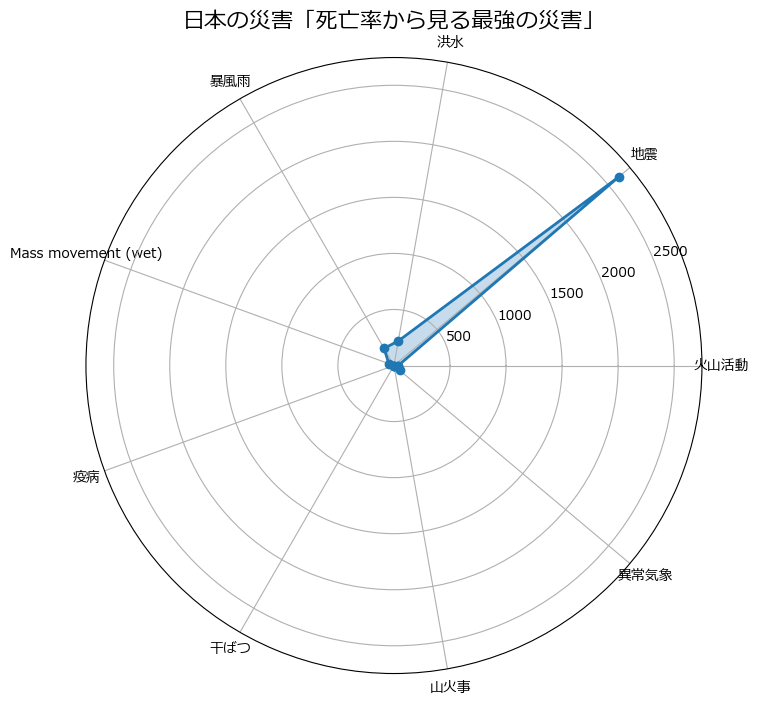

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"
df = pd.read_csv(csv_path)

# ===== 日本語のフォントの読み込み =====
plt.rcParams["font.family"] = "Meiryo"

# 列検出
country_col = [c for c in df.columns if "country" in c.lower()][0]
type_col = [c for c in df.columns if "type" in c.lower()][0]
death_col = [c for c in df.columns if "death" in c.lower()][0]

# 日本だけ
df_japan = df[df[country_col] == "Japan"].copy()

# 日本語化
mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
}

df_japan["Disaster_JP"] = df_japan[type_col].map(lambda x: mapping.get(x, x))

# 種類別まとめ
types = df_japan["Disaster_JP"].unique()
avg_death = []

for t in types:
    temp = df_japan[df_japan["Disaster_JP"] == t]
    avg_death.append(temp[death_col].sum() / len(temp))   # 1件あたり平均死者数

# レーダーチャート用角度
angles = np.linspace(0, 2 * np.pi, len(types), endpoint=False)
avg_death += avg_death[:1]
angles = np.concatenate((angles, [angles[0]]))

# グラフ
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, avg_death, "o-", linewidth=2)
ax.fill(angles, avg_death, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, types)
ax.set_title("日本の災害「死亡率から見る最強の災害」", fontsize=16)

plt.show()


結果:地震が最強です

# No.EX2 災害の **恐怖度ランキング**

災害の発生数と死者数からそれぞれの災害における「恐怖スコア」を出して、どの災害が日本にとって一番恐ろしいものなのかを可視化した。

※恐怖スコア = **(総死者数 × 2) + (発生件数 × 0.5)** で計算しています

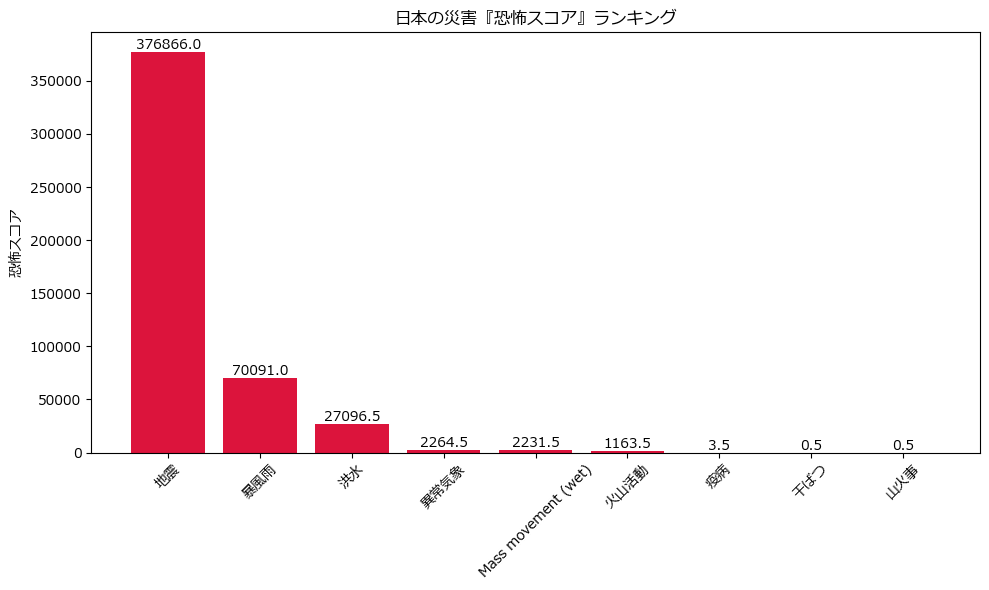

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = r"C:\Users\kuyou\Downloads\emdat.csv"
df = pd.read_csv(csv_path)

# 列検出
country_col = [c for c in df.columns if "country" in c.lower()][0]
type_col = [c for c in df.columns if "type" in c.lower()][0]
death_col = [c for c in df.columns if "death" in c.lower()][0]

# 日本だけ
df_japan = df[df[country_col] == "Japan"].copy()

# 日本語化
mapping = {
    "Earthquake": "地震",
    "Flood": "洪水",
    "Storm": "暴風雨",
    "Volcanic activity": "火山活動",
    "Extreme temperature": "異常気象",
    "Drought": "干ばつ",
    "Landslide": "地滑り",
    "Wildfire": "山火事",
    "Epidemic": "疫病",
    "Insect infestation": "昆虫害",
}
df_japan["Disaster_JP"] = df_japan[type_col].map(lambda x: mapping.get(x, x))

# 集計
result = []
for d in df_japan["Disaster_JP"].unique():
    temp = df_japan[df_japan["Disaster_JP"] == d]
    count = len(temp)
    deaths = temp[death_col].sum()
    fear_score = (deaths * 2) + (count * 0.5)   
    result.append([d, count, deaths, fear_score])

df_score = pd.DataFrame(result, columns=["災害種類", "発生件数", "死者数", "恐怖スコア"])
df_score = df_score.sort_values("恐怖スコア", ascending=False)

# グラフ
plt.figure(figsize=(10, 6))
plt.bar(df_score["災害種類"], df_score["恐怖スコア"], color="crimson")
plt.xticks(rotation=45)
plt.ylabel("恐怖スコア")
plt.title("日本の災害『恐怖スコア』ランキング")

# 数値表示
for i, v in enumerate(df_score["恐怖スコア"]):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


結果:やっぱり地震大国なだけあって**地震がダントツで恐怖スコアが高い**ですね。首都直下型地震や南海トラフ巨大地震が控えていることや東日本大震災の被害状況を振り返ってみると納得の結果ではありますね。

# まとめ


日本では地震が一番発生していると思いきや実際は暴風雨が一番発生していたり、逆に死者数は暴風雨より地震の方が圧倒的に多かったりと、自分が思っていたものとはだいぶ異なる結果となった。
今回は、今まで以上に **見やすさ** を意識して作ったため、自分の過去の作品と比べてもかなり見やすくなったと思う。
